# Loan Application Status Prediction

#### Problem Statement

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import statsmodels.api as sma
from scipy.stats import zscore
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

#### Importing dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Univariate Analysis

In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

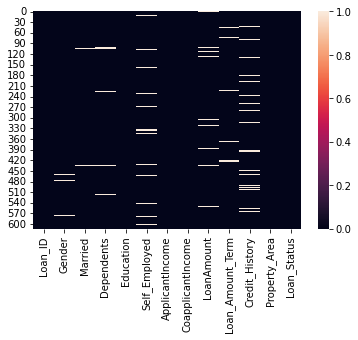

In [9]:
sns.heatmap(df.isnull())

There are some null values in the columns gender, married, dependents, self_employed, loan_amount, loan_amount_term and credit_history.

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


There is very high standard deviation in all columns (except credit history), especially in applicant income and coapplicant income as the range is very large, and due to the presence of outliers as well, which we can see in the vast difference between the 75th percentile and maximum values. 

In [11]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

loan_id is an id for all loan applicants and hence it is unique for all. We will drop it as it does not contain any relevant information for training and testing of ML models.

In [3]:
df.drop('Loan_ID', axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

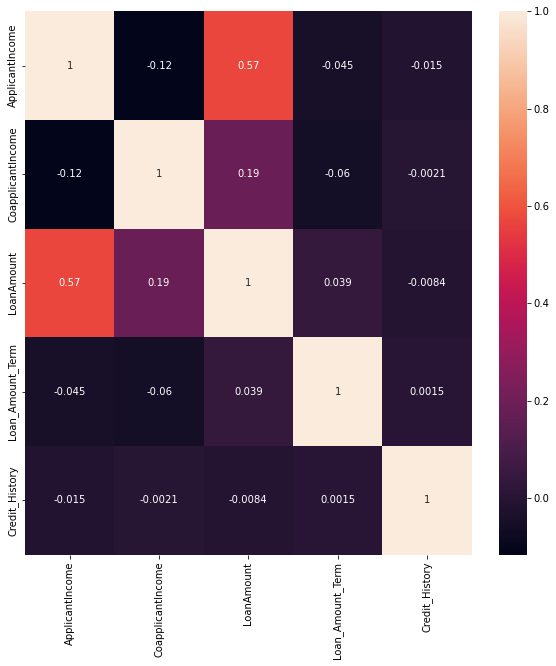

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

We can see there is only high correlation between the applicant's income and the loan amount.

In [16]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

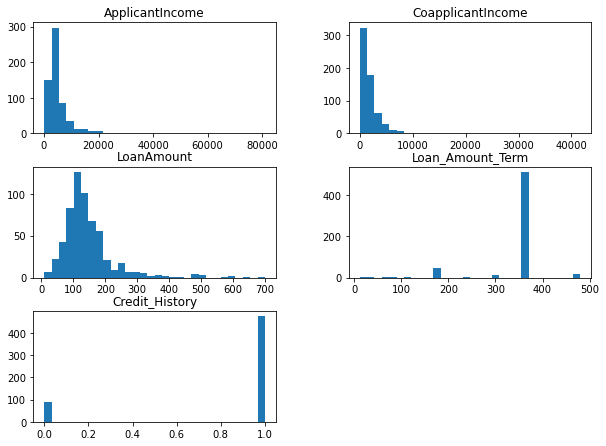

In [17]:
df.hist(figsize=(10,10), grid=False, layout=(4, 2), bins = 30)

We observe high positive skewness in applicant income and coapplicant income, and negative skewness in loan_amount_term and credit history. The negative skewness in credit history however is due to the fact that it is encoded in 0,1 values.

<AxesSubplot:>

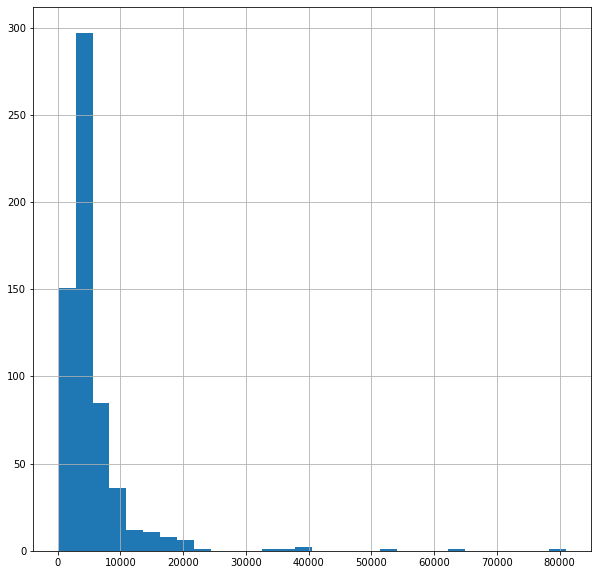

In [18]:
df['ApplicantIncome'].hist(figsize=(10,10), bins=30)

We observe high level of right skewed data due to outliers and vast range of the income of applicants. Most applicants earn around 0-10000, and very few earn 40000-80000

<AxesSubplot:>

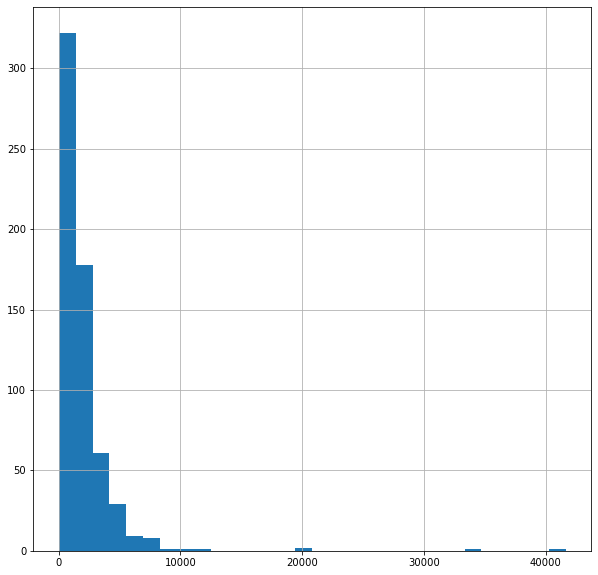

In [19]:
df['CoapplicantIncome'].hist(figsize=(10,10), bins=30)

We observe high level of right skewed data due to outliers and vast range of the income of applicants. Most coapplicants earn around 0-4000, and very few earn 10000-40000. 

<AxesSubplot:>

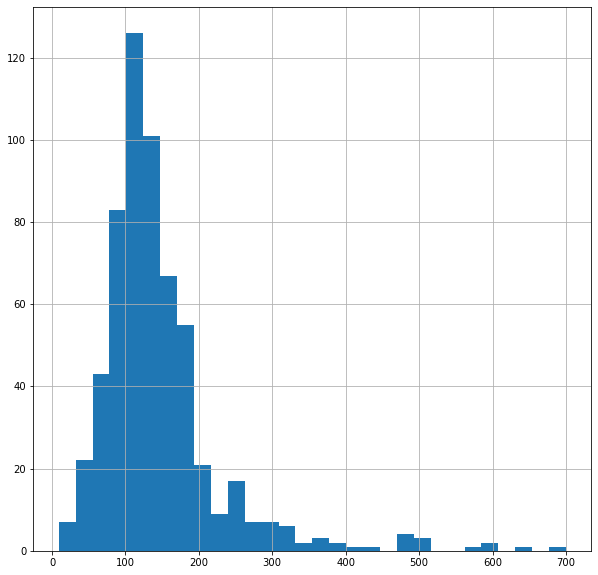

In [20]:
df['LoanAmount'].hist(figsize=(10,10), bins=30)

This data is mostly normally distributed but it starts to become right skewed from the 300 mark. Most applicants need smaller loans, but there are some applicants who need much larger loans, hence skewing the distribution.

<AxesSubplot:>

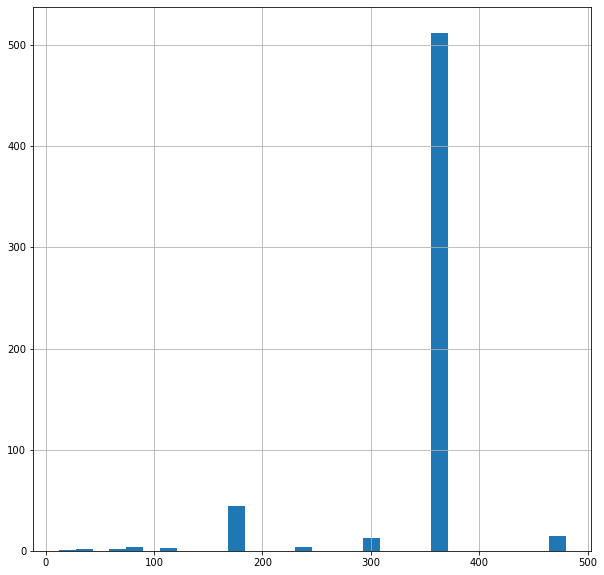

In [21]:
df['Loan_Amount_Term'].hist(figsize=(10,10), bins=30)

The majority of loan amount term is 360, hence causing negative skewness in the data.

Text(0.5, 1.0, 'Outliers in the columns')

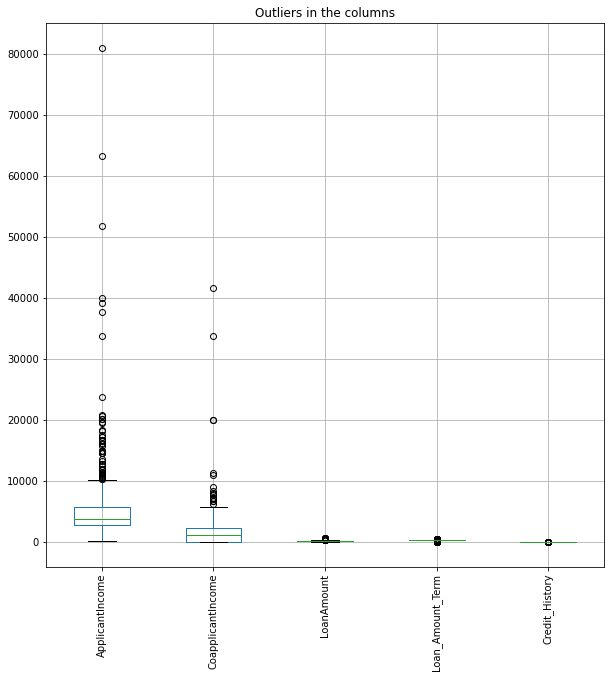

In [25]:
df.boxplot(figsize=(10,10))
plt.xticks(rotation= 90)
plt.title('Outliers in the columns')

There are several high outliers in applicant and coapplicant columns, and some outliers in the other columns too.

<AxesSubplot:xlabel='ApplicantIncome'>

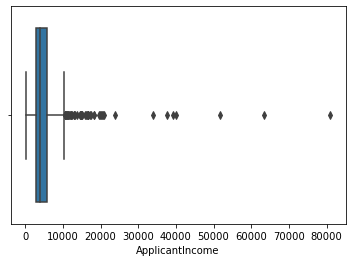

In [26]:
sns.boxplot(df['ApplicantIncome'])

Any value above 10000 is being treated as an outlier. There is only one applicant with 80000+ income, and less than 10 applicants with 30000+ income.

<AxesSubplot:xlabel='CoapplicantIncome'>

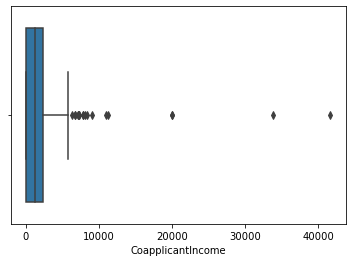

In [27]:
sns.boxplot(df['CoapplicantIncome'])

Any value above 5000 is being treated as an outlier. There is only one coapplicant with 40000+ income, and only 3 coapplicants have 20000+ income.

<AxesSubplot:xlabel='LoanAmount'>

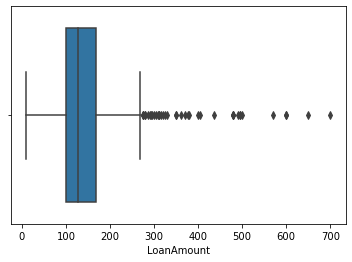

In [28]:
sns.boxplot(df['LoanAmount'])

Any loan amount above 270 is being treated as an outlier. Only 4 people need loans greater than 500

<AxesSubplot:xlabel='Gender', ylabel='count'>

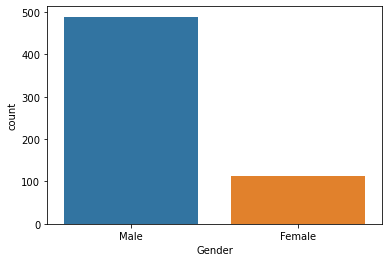

In [22]:
sns.countplot(df['Gender'])

Maximum loan applicants are male. Around 80% of the applicants are male, and about 20% are female.

<AxesSubplot:xlabel='Married', ylabel='count'>

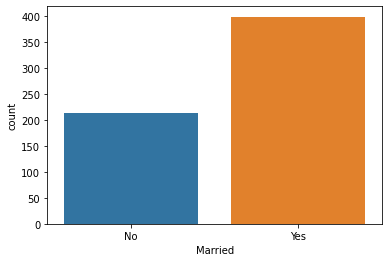

In [23]:
sns.countplot(df['Married'])

Maximum loan applicants are married. Around 60% of the applicants are married.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

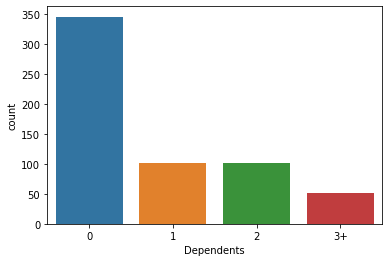

In [24]:
sns.countplot(df['Dependents'])

Maximum loan applicants have no dependents, a much less number of applicants have 1-2 dependents and least have 3+ dependents.

<AxesSubplot:xlabel='Education', ylabel='count'>

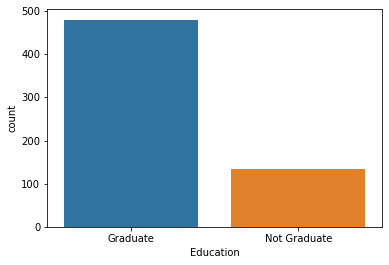

In [29]:
sns.countplot(df['Education'])

Maximum applicants are graduates. Around 75% of the applicants are graduates.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

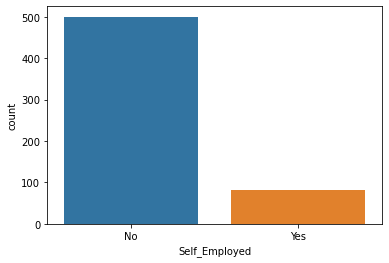

In [30]:
sns.countplot(df['Self_Employed'])

Around 80% of the applicants are not self employed. Only 20% of the applicants are self employed.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

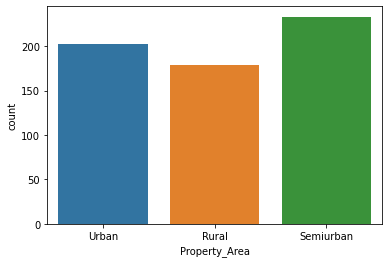

In [31]:
sns.countplot(df['Property_Area'])

Most properties are in semi urban areas, followed closely by properties in urban areas. The minority properties are in rural area, but the property area distribution is quite even overall.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

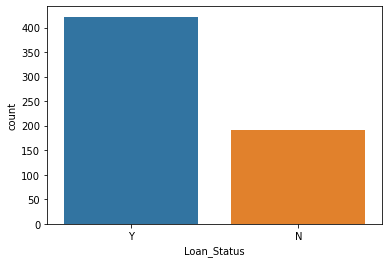

In [33]:
sns.countplot(df['Loan_Status'])

Majority of people had their application approved.

# Bivariate Analysis

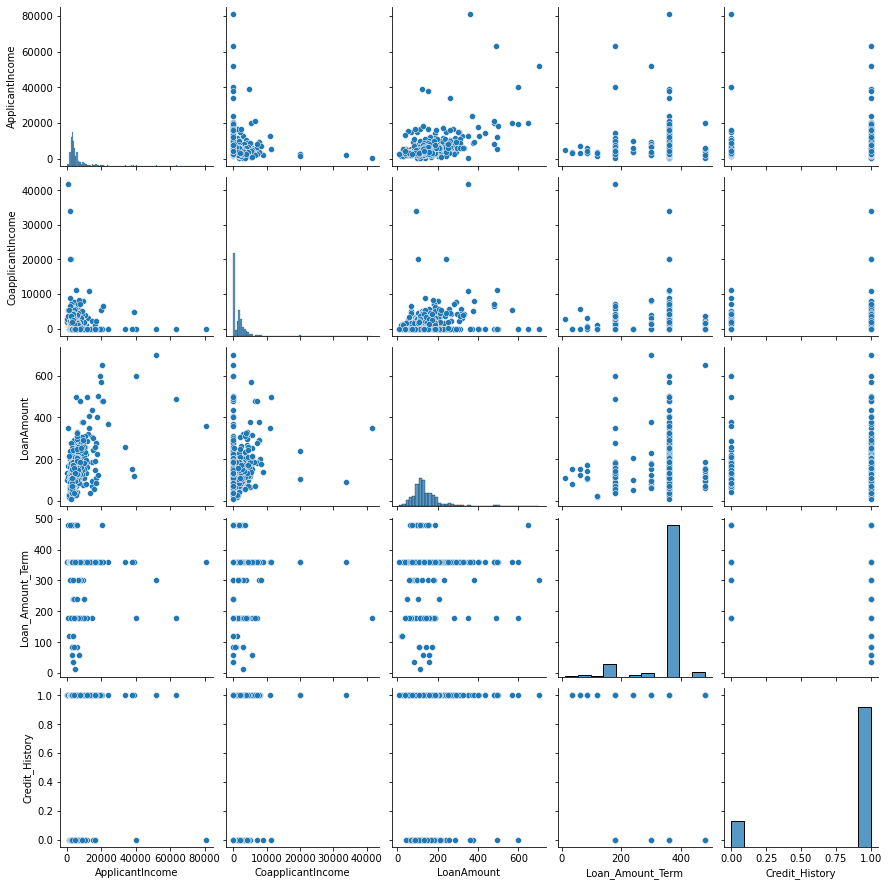

In [39]:
sns.pairplot(df)

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

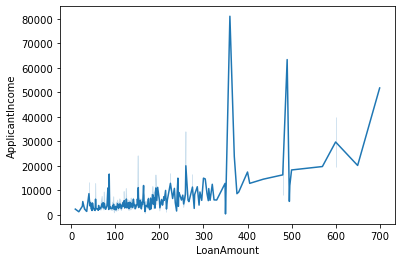

In [41]:
sns.lineplot(df['LoanAmount'], df['ApplicantIncome'])

We can observe an overall positve correlation between as the loan amount is higher when the applicant income is higher.

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

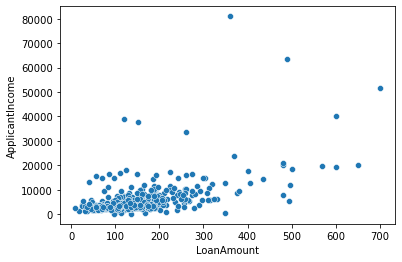

In [42]:
sns.scatterplot(df['LoanAmount'], df['ApplicantIncome'])

We can observe an overall positve correlation between as the loan amount is higher when the applicant income is higher. This is most clearly visible in the 0-300 loan amount range. However we can also see that the applicant with 80000 income needs a loan of 350, which is different from the other applicants with high income.

<AxesSubplot:xlabel='Gender', ylabel='count'>

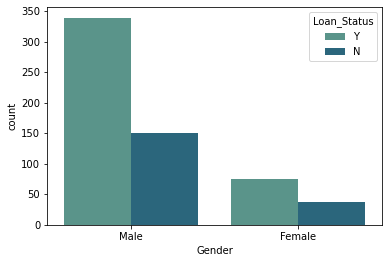

In [32]:
sns.countplot(x=df['Gender'], hue=df['Loan_Status'], palette='crest')

Around 70% male applicants had their loan approved and around 65% female applicants had their loan approved.

<AxesSubplot:xlabel='Education', ylabel='count'>

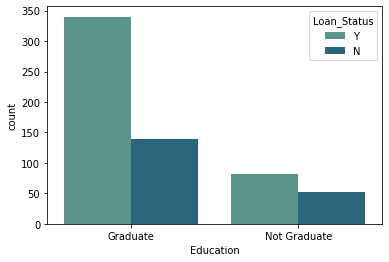

In [34]:
sns.countplot(x=df['Education'], hue=df['Loan_Status'], palette='crest')

Around 70% of the applicants who were graduates had their loan approved, but only 60% of the non graduate applicants had their loan approved.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

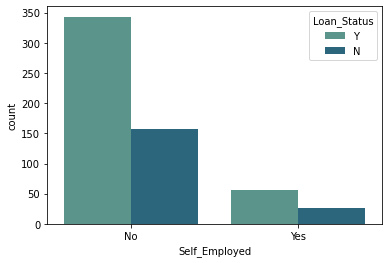

In [35]:
sns.countplot(x=df['Self_Employed'], hue=df['Loan_Status'], palette='crest')

Around 70% of both self-employed and not self-employed applicants had their loan approved.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

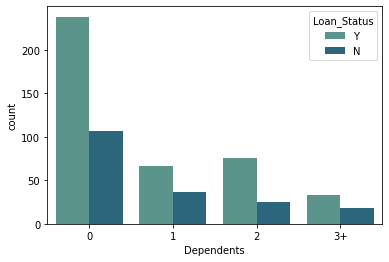

In [36]:
sns.countplot(x=df['Dependents'], hue=df['Loan_Status'], palette='crest')

1. 70% of applicants with no dependents had their loan approved
2. 70% of applicants with 1 dependent had their loan approved
3. 80% of applicants with 2 dependents had their loan approved
4. 60% of applicants with 3+ dependents had their loan approved

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

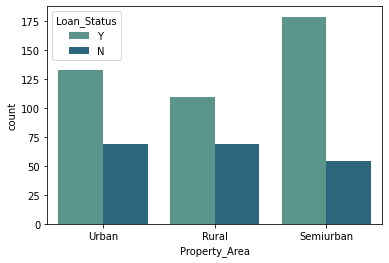

In [37]:
sns.countplot(x=df['Property_Area'], hue=df['Loan_Status'], palette='crest')

Highest loan approval rate is for semi-urban area at 75%, and (comparatively) lowest approval rate is for rural area property, where it is 60%.
Loan approval rate f0r urban area is 65%.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

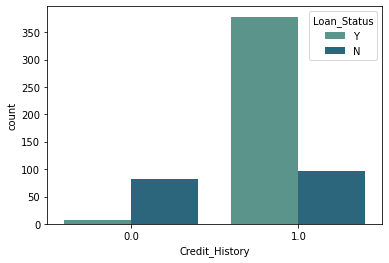

In [46]:
sns.countplot(x=df['Credit_History'], hue=df['Loan_Status'], palette='crest')

People with credit history of 0 did NOT have their loan status approved. 80% of people with credit history 1 got their loan approved.

# Feature Engineering

# Imputing null values

In [4]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
imp = SimpleImputer(strategy='most_frequent')

Replacing null values with the most frequently occurring values

In [5]:
df['Gender'] = imp.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married'] = imp.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents'] = imp.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed'] = imp.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Loan_Amount_Term'] = imp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History'] = imp.fit_transform(df['Credit_History'].values.reshape(-1,1))

In [6]:
imp = SimpleImputer(strategy='median')

Replacing missing values with the median

In [7]:
df['LoanAmount'] = imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))

In [14]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

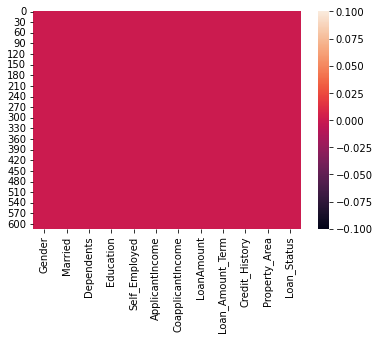

In [15]:
sns.heatmap(df.isnull())

There are no more null values in the data set.

# Converting loan amount term and credit history column to string type

Since the values are more categorical, the column needs to be object/string type.

In [8]:
df['Loan_Amount_Term']= df['Loan_Amount_Term'].astype(str)
df['Credit_History']= df['Credit_History'].astype(str)

In [9]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
df['Loan_Amount_Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: object

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

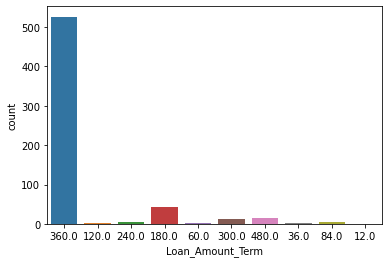

In [11]:
sns.countplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

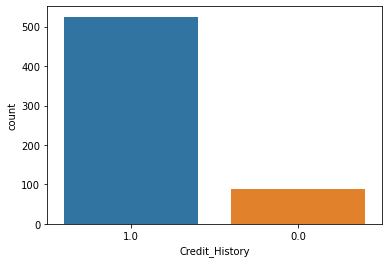

In [12]:
sns.countplot(df['Credit_History'])

Now these columns are categorical type, which makes more sense.

# Dealing with skewness

In [15]:
df.skew()

ApplicantIncome      2.967286
CoapplicantIncome    0.979561
LoanAmount           1.342269
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [13]:
df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.sqrt(df['LoanAmount'])

In [14]:
df.skew()

ApplicantIncome      2.967286
CoapplicantIncome    0.979561
LoanAmount           1.342269
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [16]:
df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])

In [17]:
df.skew()

ApplicantIncome      1.682077
CoapplicantIncome   -0.008866
LoanAmount           1.342269
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [18]:
df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.sqrt(df['LoanAmount'])

In [21]:
df.skew()

ApplicantIncome      0.796286
CoapplicantIncome   -0.174220
LoanAmount           0.614833
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

Now we have eliminated skewness.

# Encoding object type columns

In [22]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [23]:
le = LabelEncoder()
list1 = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History','Property_Area','Loan_Status']
for i in list1:
    df[i] = le.fit_transform(df[i].astype(str))

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1.719660,0.000000,3.363586,6,1,2,1
1,1,1,1,0,0,1.693643,2.496319,3.363586,6,1,0,0
2,1,1,0,0,1,1.649378,0.000000,2.850270,6,1,2,1
3,1,1,0,1,0,1.634022,2.639781,3.309751,6,1,2,1
4,1,0,0,0,0,1.722402,0.000000,3.445917,6,1,2,1


Now all the columns are numerical type. Also, due to skewness removal, we have simultaneously scaled the data.

# SMOTE

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

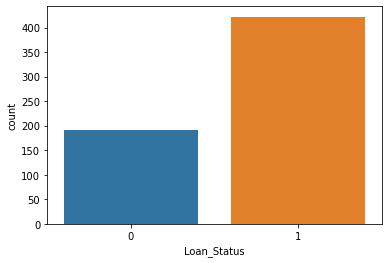

In [25]:
sns.countplot(df['Loan_Status'])

We can see that there is high discrepancy here, and there are many more people who had their loan approved. So to ensure effective learning of the machine learning models, we will use SMOTE

### Splitting data for applying SMOTE

In [26]:
xi = df.iloc[:,0:-1]

In [27]:
yi = df.iloc[:,-1]
yi.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [28]:
smt = SMOTE()
x,y = smt.fit_resample(xi,yi)

In [29]:
y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

Now we have an equal amount of output categories, so the models can learn more effectively.

In [30]:
df = x
df['Loan_Status'] = y

In [31]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1.719660,0.000000,3.363586,6,1,2,1
1,1,1,1,0,0,1.693643,2.496319,3.363586,6,1,0,0
2,1,1,0,0,1,1.649378,0.000000,2.850270,6,1,2,1
3,1,1,0,1,0,1.634022,2.639781,3.309751,6,1,2,1
4,1,0,0,0,0,1.722402,0.000000,3.445917,6,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
839,0,1,0,0,0,1.620129,2.631996,3.245333,6,0,2,0
840,1,1,2,0,0,1.721312,0.000000,3.773313,2,1,1,0
841,0,0,0,1,0,1.646477,0.000000,2.915653,4,1,0,0
842,1,1,2,1,0,1.634219,2.447204,3.348666,6,0,0,0


# Checking multicollinearity with variance inflation factor

In [32]:
def vif_calc():
    vif = pd.DataFrame()
    vif['variables'] = df[0:-1].columns
    vif['VIF FACTOR'] = [variance_inflation_factor(df[0:-1].values,i) for i in range(df[0:-1].shape[1])]
    return vif

In [33]:
vif_calc()

,variables,VIF FACTOR
0,Gender,6.244233
1,Married,3.717056
2,Dependents,1.765441
3,Education,1.275746
4,Self_Employed,1.148355
5,ApplicantIncome,136.364232
6,CoapplicantIncome,2.719892
7,LoanAmount,113.770050
8,Loan_Amount_Term,22.923835
9,Credit_History,5.634596


There is only slightly high multicollinearity between applicant income and loan amount

<AxesSubplot:>

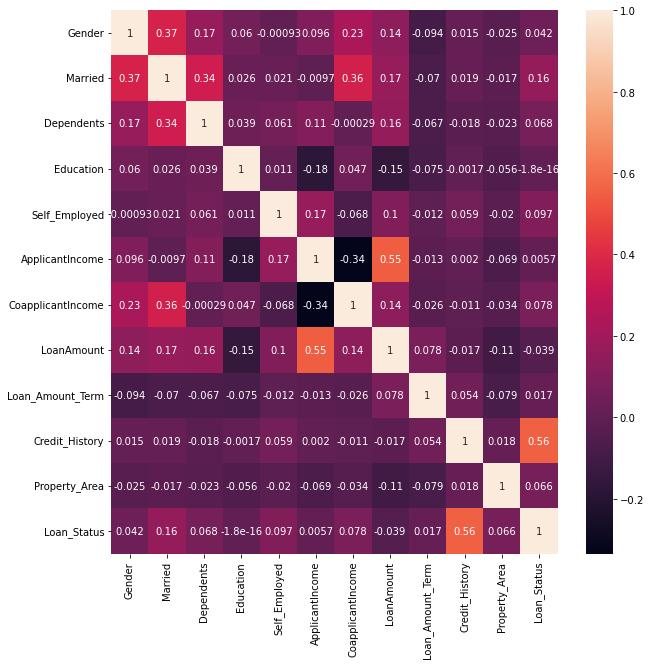

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

There is a slightly high positive correlation between applicant's income and loan amount. However, both of these pieces of information are crucial information for the model to learn so we cannot remove those columns.

# Splitting the data for training and testing

In [35]:
x = df.iloc[:,0:-1]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,1.719660,0.000000,3.363586,6,1,2
1,1,1,1,0,0,1.693643,2.496319,3.363586,6,1,0
2,1,1,0,0,1,1.649378,0.000000,2.850270,6,1,2
3,1,1,0,1,0,1.634022,2.639781,3.309751,6,1,2
4,1,0,0,0,0,1.722402,0.000000,3.445917,6,1,2
...,...,...,...,...,...,...,...,...,...,...,...
839,0,1,0,0,0,1.620129,2.631996,3.245333,6,0,2
840,1,1,2,0,0,1.721312,0.000000,3.773313,2,1,1
841,0,0,0,1,0,1.646477,0.000000,2.915653,4,1,0
842,1,1,2,1,0,1.634219,2.447204,3.348666,6,0,0


In [36]:
y = df.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int32

### Models

In [37]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [38]:
models = [lr, knn, svc, dtc, rf]

### Finding best random state

In [39]:
best_random_state = 0
best_score = 0
for i in range(100):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=i)
    lr.fit(xtrain,ytrain)
    pred = lr.predict(xtest)
    score = accuracy_score(ytest, pred)
    print(f'At random score {i}, accuracy score is {score}')
    if score > best_score:
        best_score = score
        best_random_state = i
print(f'Best score is {best_score} at random state {best_random_state}')

At random score 0, accuracy score is 0.7396449704142012
At random score 1, accuracy score is 0.7337278106508875
At random score 2, accuracy score is 0.7337278106508875
At random score 3, accuracy score is 0.7396449704142012
At random score 4, accuracy score is 0.757396449704142
At random score 5, accuracy score is 0.7337278106508875
At random score 6, accuracy score is 0.7337278106508875
At random score 7, accuracy score is 0.7633136094674556
At random score 8, accuracy score is 0.7159763313609467
At random score 9, accuracy score is 0.7810650887573964
At random score 10, accuracy score is 0.6923076923076923
At random score 11, accuracy score is 0.757396449704142
At random score 12, accuracy score is 0.7751479289940828
At random score 13, accuracy score is 0.6982248520710059
At random score 14, accuracy score is 0.7218934911242604
At random score 15, accuracy score is 0.7928994082840237
At random score 16, accuracy score is 0.7455621301775148
At random score 17, accuracy score is 0.739

### We will proceed with random state 45

In [40]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=45)

In [41]:
for i in models:
    i.fit(xtrain,ytrain)
    training_score = cross_val_score(i, xtrain, ytrain, cv=5)
    pred = i.predict(xtest)
    score = accuracy_score(ytest, pred)
    print(f'Model {i} had training score of {training_score.mean()*100}% and an accuracy score of {score}')

Model LogisticRegression() had training score of 73.33333333333333% and an accuracy score of 0.8047337278106509
Model KNeighborsClassifier() had training score of 71.85185185185186% and an accuracy score of 0.7751479289940828
Model SVC() had training score of 73.33333333333331% and an accuracy score of 0.7869822485207101
Model DecisionTreeClassifier() had training score of 70.37037037037037% and an accuracy score of 0.727810650887574
Model RandomForestClassifier() had training score of 78.96296296296296% and an accuracy score of 0.8284023668639053


### We will proceed with random forest classifier

In [42]:
parameters = { 
    'n_estimators': [200, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': range(1,5)
}

In [43]:
grid = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)

In [44]:
grid.fit(xtrain, ytrain)
grid.best_params_

{'criterion': 'log_loss',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

### There are the parameters we will put in the model for final training and testing.

In [45]:
rf = RandomForestClassifier(criterion='log_loss', min_samples_leaf=1, min_samples_split=2, n_estimators=500)

In [46]:
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
print(f'The cross validated score of this model is: {(cross_val_score(rf, xtrain,ytrain,cv=5).mean())*100}')

The cross validated score of this model is: 78.81481481481481


In [47]:
print(f'The accuracy score is {accuracy_score(ytest, pred)*100}')

The accuracy score is 82.24852071005917


In [48]:
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

[[55 20]
 [10 84]]
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        75
           1       0.81      0.89      0.85        94

    accuracy                           0.82       169
   macro avg       0.83      0.81      0.82       169
weighted avg       0.82      0.82      0.82       169



# AUC-ROC

In [49]:
# predict probability of getting 1 with different threshold values
pred = rf.predict_proba(xtest)[:,1]

In [50]:
pred

array([0.572, 0.942, 0.426, 0.9  , 0.348, 0.02 , 0.972, 0.606, 0.26 ,
       0.886, 0.584, 0.028, 0.002, 0.572, 0.614, 0.82 , 0.054, 0.658,
       0.542, 0.322, 0.708, 0.656, 0.674, 0.412, 0.598, 0.374, 0.906,
       0.606, 0.85 , 0.78 , 0.018, 0.064, 0.77 , 0.816, 0.252, 0.032,
       0.768, 0.546, 0.014, 0.24 , 0.518, 0.4  , 0.588, 0.752, 0.02 ,
       0.882, 0.698, 0.842, 0.05 , 0.768, 0.74 , 0.488, 0.59 , 0.724,
       0.098, 0.81 , 0.074, 0.79 , 0.77 , 0.47 , 0.108, 0.696, 0.818,
       0.842, 0.618, 0.714, 0.048, 0.94 , 0.062, 0.704, 0.846, 0.48 ,
       0.67 , 0.57 , 0.54 , 0.638, 0.448, 0.512, 0.024, 0.008, 0.938,
       0.58 , 0.628, 0.118, 0.014, 0.036, 0.776, 0.028, 0.762, 0.908,
       0.376, 0.848, 0.188, 0.014, 0.606, 0.746, 0.176, 0.782, 0.782,
       0.746, 0.65 , 0.416, 0.572, 0.008, 0.812, 0.81 , 0.806, 0.052,
       0.552, 0.056, 0.02 , 0.038, 0.006, 0.088, 0.82 , 0.658, 0.014,
       0.862, 0.64 , 0.312, 0.008, 0.046, 0.014, 0.666, 0.672, 0.444,
       0.802, 0.918,

In [51]:
fpr, tpr, thresholds = roc_curve(ytest, pred)

<function matplotlib.pyplot.show(close=None, block=None)>

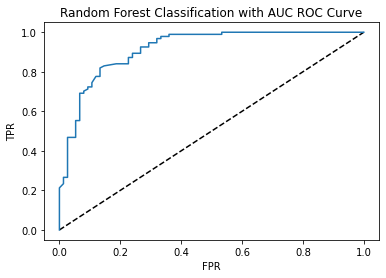

In [52]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Random Forest Classification with AUC ROC Curve')
plt.show

We can observe that around 90% of area is under the curve

In [53]:
auc_score = roc_auc_score(ytest, pred)
auc_score

0.9157446808510639

## Conclusion: Random Forest Classifier is the best model with cross val score of 78.81%, and accuracy score of 82.24%, and roc-auc score of 91.57%

# Saving the best model

In [54]:
import pickle
filename = 'loanapplication.pkl'
pickle.dump(rf, open(filename, 'wb'))